In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime as dt

In [6]:
df=pd.read_csv('UDEMY_TSA_FINAL-2/Data/starbucks.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1006 non-null   object 
 1   Close   1006 non-null   float64
 2   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.7+ KB


In [7]:
df=pd.read_csv('UDEMY_TSA_FINAL-2/Data/starbucks.csv', parse_dates=True, index_col='Date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6 KB


In [8]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


## resample

### yearly means

In [10]:
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [11]:
def first_day(entry):
    if len(entry):
        return entry[0]

In [12]:
# returns the first day of the period regardless of sampling rate
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


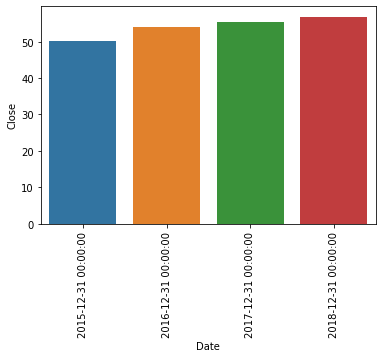

In [21]:
yearly_closing=df.resample('A').mean()
ax=sns.barplot(y=yearly_closing['Close'], x=yearly_closing.index, orient='v')
plt.xticks(rotation=90);

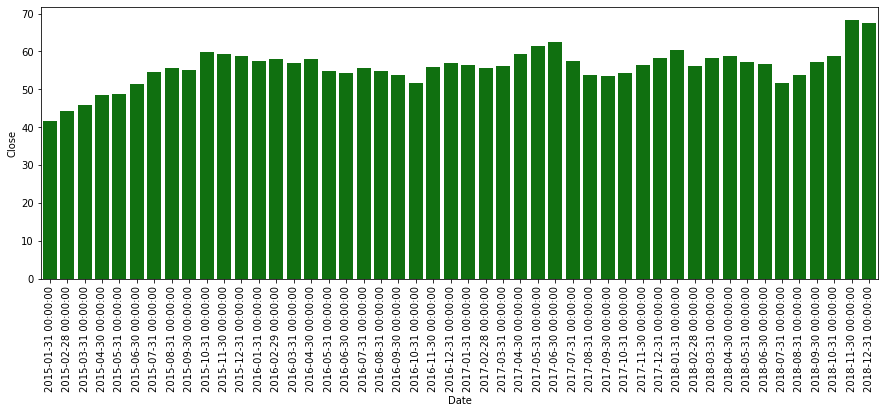

In [27]:
monthly_closing=df.resample('M').max()

plt.figure(figsize=(15,5))
ax=sns.barplot(y=monthly_closing['Close'], x=monthly_closing.index, orient='v', color='g')
plt.xticks(rotation=90);

## time shifting

In [28]:
# shoft froward
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [29]:
df.shift(1).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [30]:
df.shift(-1).head()

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0


In [31]:
df.shift(periods=1, freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


## rolling & expanding

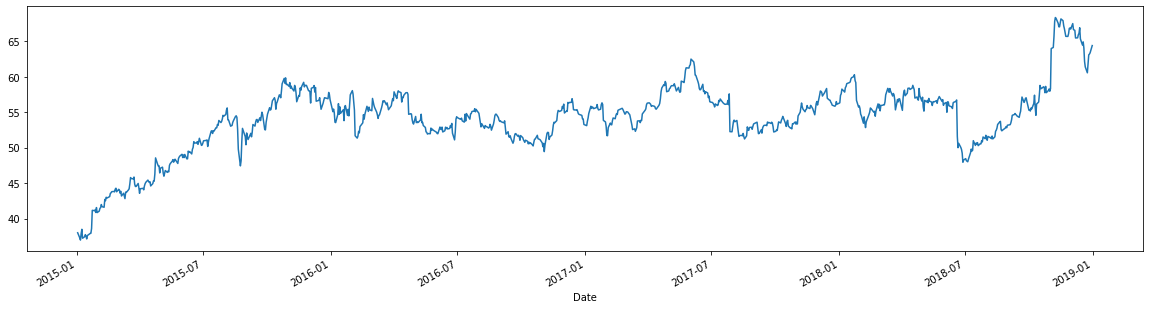

In [35]:
df['Close'].plot(figsize=(20,5));

In [37]:
# 7 days rolling mean
df.rolling(window=7).mean().head(10)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


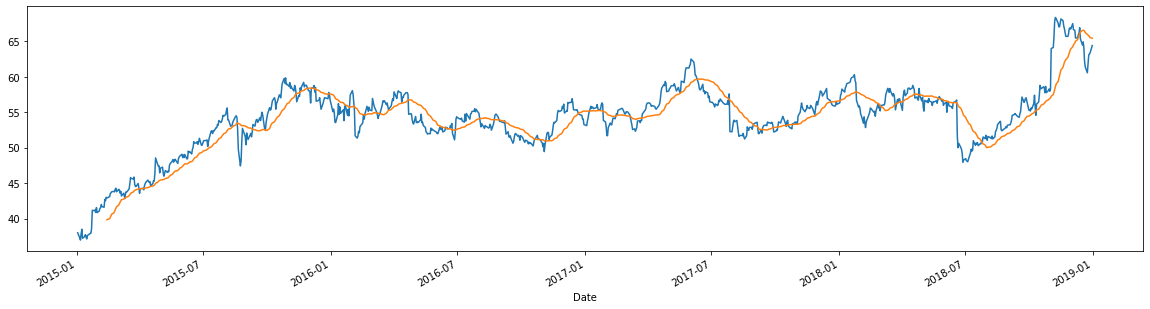

In [38]:
df['Close'].plot(figsize=(20,5))
df.rolling(window=30).mean()['Close'].plot();

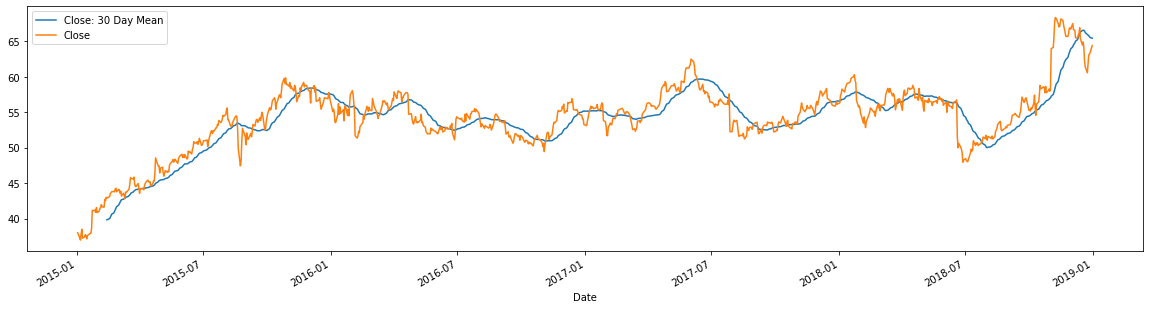

In [41]:
df['Close: 30 Day Mean']=df['Close'].rolling(window=30).mean()
df[['Close: 30 Day Mean', 'Close']].plot(figsize=(20,5));

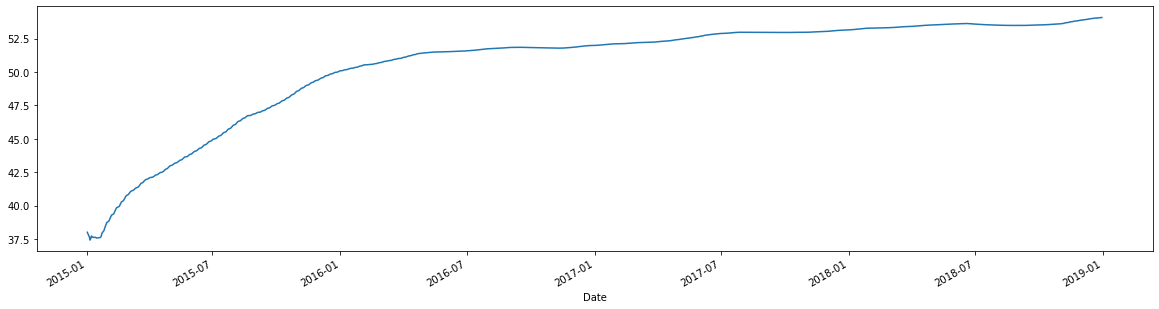

In [44]:
# expanding

df['Close'].expanding().mean().plot(figsize=(20,5));

## Visualizing Time Series

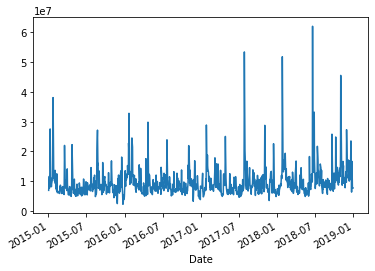

In [46]:
df['Volume'].plot();

<AxesSubplot:xlabel='Date', ylabel='Close'>

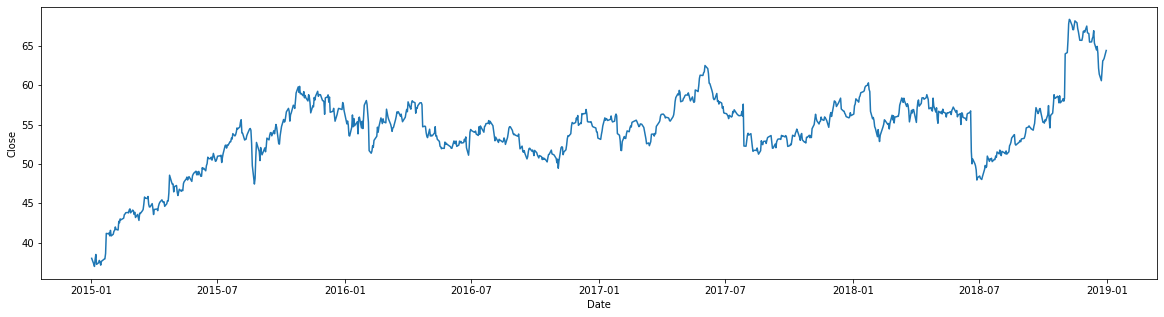

In [49]:
plt.figure(figsize=(20,5))
sns.lineplot(y=df['Close'], x=df.index)

<AxesSubplot:xlabel='Date', ylabel='Close'>

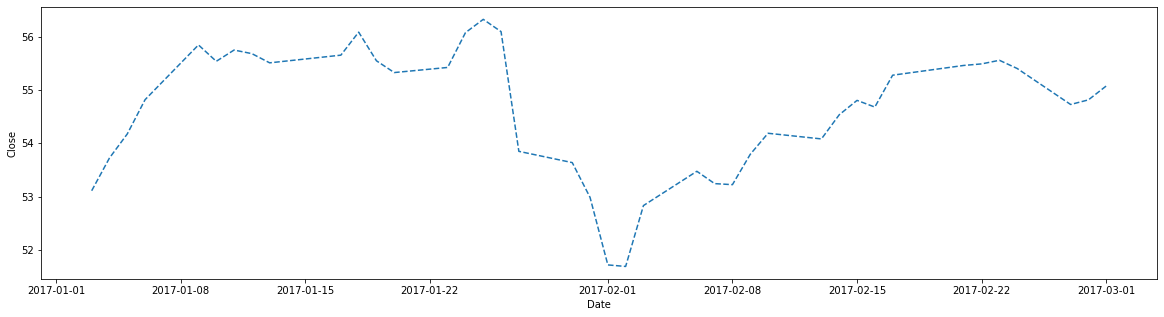

In [75]:
plt.figure(figsize=(20,5))
x=df['2017-01-01':'2017-03-01']
sns.lineplot(y=x['Close'], x=x.index, linestyle='--')

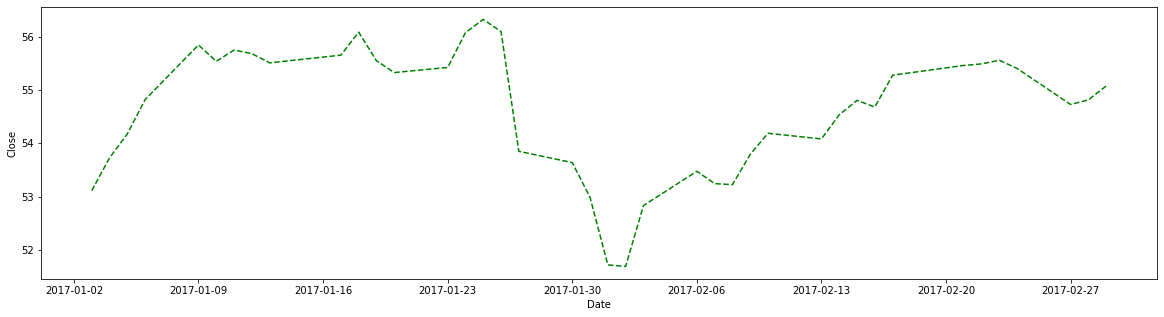

In [ ]:
plt.figure(figsize=(20,5))
x=df['2017-01-01':'2017-03-01']
ax=sns.lineplot(y=x['Close'], x=x.index, linestyle='--', color='g')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

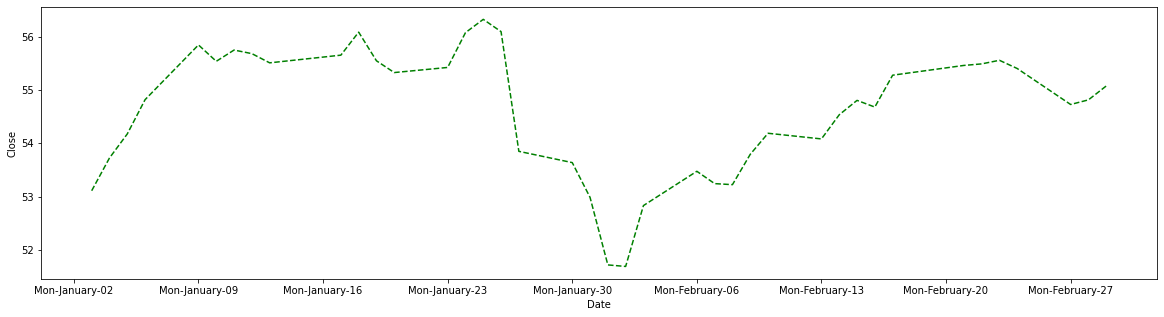

In [88]:
plt.figure(figsize=(20,5))
x=df['2017-01-01':'2017-03-01']
ax=sns.lineplot(y=x['Close'], x=x.index, linestyle='--', color='g')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))

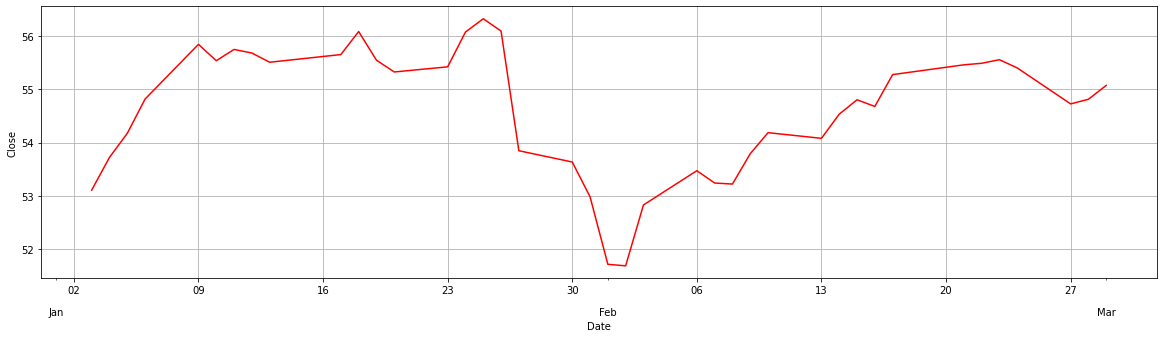

In [94]:
plt.figure(figsize=(20,5))
x=df['2017-01-01':'2017-03-01']
ax=sns.lineplot(x=x.index, y=x['Close'], color='r')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.xaxis.grid(True)
ax.yaxis.grid(True)